# Trabajo final curso de ciencia de datos

In [116]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns

In [62]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [63]:
df_nivel_educativo = pd.read_excel("C:/Users/ASUS/Downloads/P29-Total_pais.xls", skiprows=2)
df_nivel_educativo.head()

,Sexo y grupo de edad,Población de 5 años y más (1),Población de 5 años y más que asistió a un establecimiento educativo,Nivel de educación alcanzado y completud del nivel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,Inicial,Primario,NaN,Secundario,NaN,Superior no universitario,NaN,Universitario,NaN,Post universitario,NaN
1,NaN,NaN,NaN,NaN,Incompleto,Completo,Incompleto,Completo,Incompleto,Completo,Incompleto,Completo,Incompleto,Completo
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,36609397.0,24540780.0,34582,3155465,6937532,4063343,5470276,473832,1548473,992231,1679798,22669,162579
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_nivel_educativo.dtypes

edad                                                                      object
Población de 5 años y más (1)                                            float64
Población de 5 años y más que asistió a un establecimiento educativo     float64
inicial_incompleto                                                        object
primario_completo                                                         object
primario_incompleto                                                       object
secundario_incompleto                                                     object
secundario_completo                                                       object
superior_no_univ_incompleto                                               object
superior_no_univ_completo                                                 object
universitario_incompleto                                                  object
universitario_completo                                                    object
post_uni_incompleto         

Para realizar la limpieza de datos, voy a eliminar filas y columnas con valores NaN, ya que para hacer el cuadro va a ser más legible y también resetear el indice para no generar problemas a futuro. 

In [131]:
df_nivel_educativo = df_nivel_educativo.drop([0, 10])
df_nivel_educativo = df_nivel_educativo.reset_index(drop=True)
df_nivel_educativo.isnull().sum()
df_nivel_educativo = df_nivel_educativo.dropna()

df_nivel_educativo.head()

,edad,Población de 5 años y más (1),Población de 5 años y más que asistió a un establecimiento educativo,inicial_incompleto,primario_completo,primario_incompleto,secundario_incompleto,secundario_completo,superior_no_univ_incompleto,superior_no_univ_completo,universitario_incompleto,universitario_completo,post_uni_incompleto,post_uni_completo
0,10-14,3469616.0,73486.0,636,30359,25901,16590,-,-,-,-,-,-,-
1,15-19,3510806.0,1063389.0,862,171083,240010,436463,188488,7401,1405,17677,-,-,-
2,25-29,3113347.0,2601363.0,1181,171950,493816,517543,816597,78164,170628,143341,195839,4111,8193
3,30-39,5752126.0,5271370.0,2382,367298,1270170,874322,1296959,147884,455712,289584,504702,9565,52792
4,50-59,3905791.0,3697567.0,2623,522229,1229541,459654,722309,56228,232110,143196,295510,2509,31658


Como el data frame que conseguí tiene mal nombradas las columnas, arme un diccionario para renombrarlas y darle claridad al data frame. 

Ahora tengo quiero quedarme solo con las edad de la población total, ya que el cuadro inclueye los datos divididos por sexo también.

In [132]:
df_final = df_nivel_educativo.iloc[0:7]
df_final

,edad,Población de 5 años y más (1),Población de 5 años y más que asistió a un establecimiento educativo,inicial_incompleto,primario_completo,primario_incompleto,secundario_incompleto,secundario_completo,superior_no_univ_incompleto,superior_no_univ_completo,universitario_incompleto,universitario_completo,post_uni_incompleto,post_uni_completo
0,10-14,3469616.0,73486.0,636,30359,25901,16590,-,-,-,-,-,-,-
1,15-19,3510806.0,1063389.0,862,171083,240010,436463,188488,7401,1405,17677,-,-,-
2,25-29,3113347.0,2601363.0,1181,171950,493816,517543,816597,78164,170628,143341,195839,4111,8193
3,30-39,5752126.0,5271370.0,2382,367298,1270170,874322,1296959,147884,455712,289584,504702,9565,52792
4,50-59,3905791.0,3697567.0,2623,522229,1229541,459654,722309,56228,232110,143196,295510,2509,31658
5,60-69,2911767.0,2737697.0,2834,564169,1014202,270003,458327,26160,139333,73664,171646,935,16424
6,80 y más,993620.0,903728.0,1558,289344,391651,41373,102069,3130,34208,9112,29525,88,1670


In [133]:

nuevos_nombres = {
    "Sexo y grupo de edad" : "edad",
    "Población de 5 años y más que asistió a un establecimiento educativo": "inicial_completo",
    "Nivel de educación alcanzado y completud del nivel": "inicial_incompleto",
    "Unnamed: 4": "primario_completo",
    "Unnamed: 5": "primario_incompleto",
    "Unnamed: 6": "secundario_incompleto",
    "Unnamed: 7": "secundario_completo",
    "Unnamed: 8": "superior_no_univ_incompleto",
    "Unnamed: 9": "superior_no_univ_completo",
    "Unnamed: 10": "universitario_incompleto",
    "Unnamed: 11": "universitario_completo",
    "Unnamed: 12": "post_uni_incompleto",
    "Unnamed: 13": "post_uni_completo"
}

df_final = df_final.rename(columns=nuevos_nombres)

df_final.head()

,edad,Población de 5 años y más (1),Población de 5 años y más que asistió a un establecimiento educativo,inicial_incompleto,primario_completo,primario_incompleto,secundario_incompleto,secundario_completo,superior_no_univ_incompleto,superior_no_univ_completo,universitario_incompleto,universitario_completo,post_uni_incompleto,post_uni_completo
0,10-14,3469616.0,73486.0,636,30359,25901,16590,-,-,-,-,-,-,-
1,15-19,3510806.0,1063389.0,862,171083,240010,436463,188488,7401,1405,17677,-,-,-
2,25-29,3113347.0,2601363.0,1181,171950,493816,517543,816597,78164,170628,143341,195839,4111,8193
3,30-39,5752126.0,5271370.0,2382,367298,1270170,874322,1296959,147884,455712,289584,504702,9565,52792
4,50-59,3905791.0,3697567.0,2623,522229,1229541,459654,722309,56228,232110,143196,295510,2509,31658


In [134]:
columnas_numericas = ["inicial_incompleto", "primario_incompleto", "primario_completo", 
                      "secundario_incompleto", "secundario_completo", "superior_no_univ_incompleto", 
                      "superior_no_univ_completo", "universitario_incompleto", 
                      "universitario_completo", "post_uni_incompleto", "post_uni_completo"]

df_final[columnas_numericas] = df_final[columnas_numericas].apply(pd.to_numeric, errors='coerce')
df_final.dtypes

edad                                                                      object
Población de 5 años y más (1)                                            float64
Población de 5 años y más que asistió a un establecimiento educativo     float64
inicial_incompleto                                                         int64
primario_completo                                                          int64
primario_incompleto                                                        int64
secundario_incompleto                                                      int64
secundario_completo                                                      float64
superior_no_univ_incompleto                                              float64
superior_no_univ_completo                                                float64
universitario_incompleto                                                 float64
universitario_completo                                                   float64
post_uni_incompleto         

Ahora voy a graficar los outliner para verlo graficamente

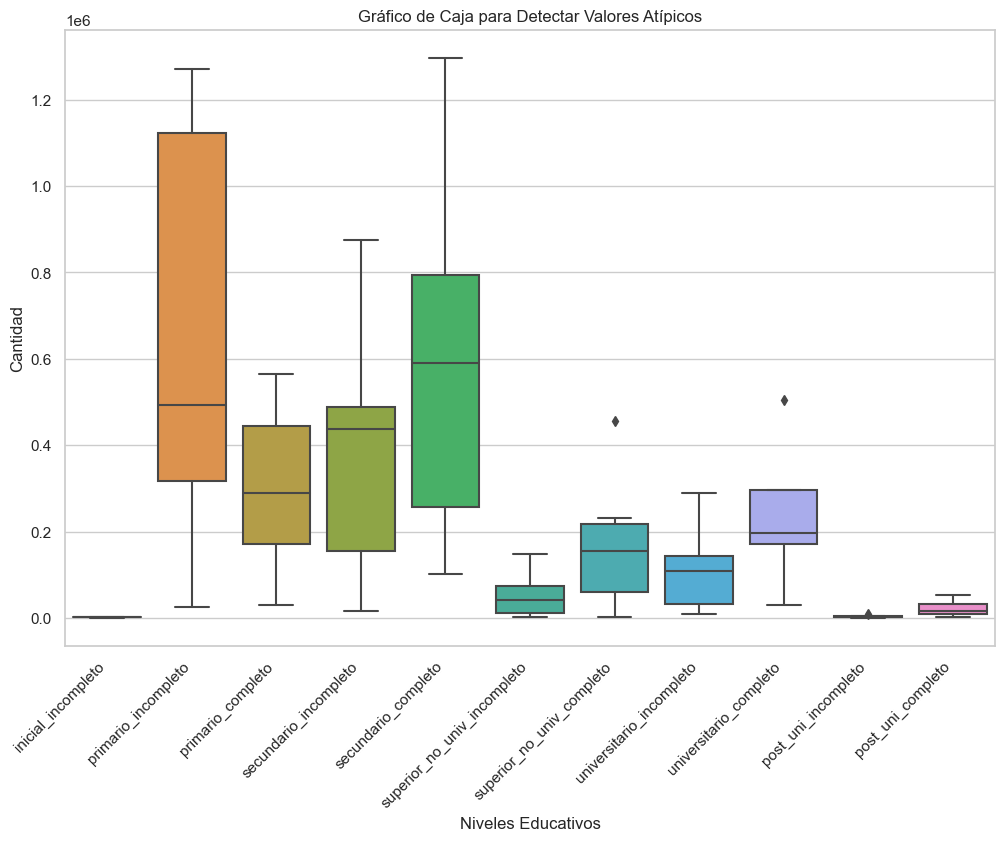

In [135]:
Columnas_numericas = ['Inicial Incompleto', 'Primario Completo', 'Primario Incompleto', 'Secundario Incompleto',
                      'Secundario Completo', 'Superior No Univ Incompleto', 'Superior No Univ Completo',
                      'Universitario Incompleto', 'Universitario Completo', 'Post Uni Incompleto', 'Post Uni Completo']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_final[columnas_numericas])
plt.title('Gráfico de Caja para Detectar Valores Atípicos')
plt.xlabel('Niveles Educativos')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

# Grafico de barras

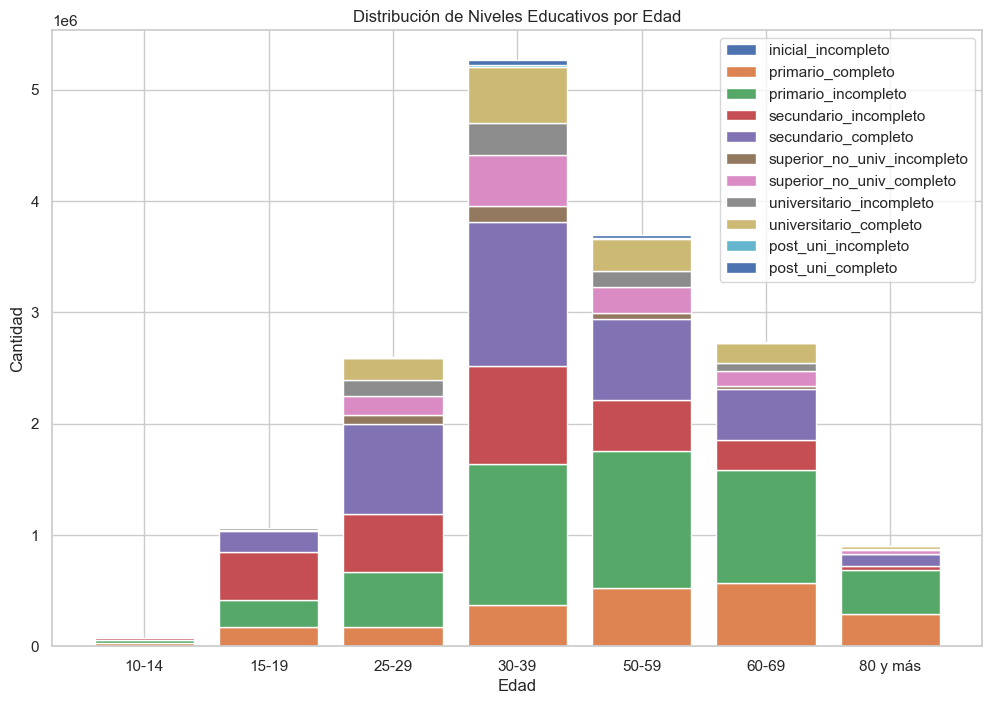

In [136]:
columnas_nivel = ['inicial_incompleto', 'primario_completo', 'primario_incompleto', 
                  'secundario_incompleto', 'secundario_completo', 'superior_no_univ_incompleto', 
                  'superior_no_univ_completo', 'universitario_incompleto', 'universitario_completo', 
                  'post_uni_incompleto', 'post_uni_completo']

df_nivel = df_final[columnas_nivel]
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras, para no repetir la misma linea para cada columna, se me ocurrió ayudarme de "for" y el condicional. Me apoye en perfeccionar el codigo en el chat porque siempre me rompia el código. 
for i, col in enumerate(columnas_nivel):
    if i == 0:
        plt.bar(df_final['edad'], df_nivel[col], label=col)
    else:
        plt.bar(df_final['edad'], df_nivel[col], bottom=df_nivel.iloc[:, :i].sum(axis=1), label=col)

plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.title("Distribución de Niveles Educativos por Edad")
plt.legend()
plt.show()

# hipotesis

La hipotesis que planteo es que hay una diferencia  en la tasa de finalización del nivel universitario entre dos grupos de edad, específicamente, se espera que las personas en el rango de 60 a 80 años hayan completado el nivel universitario en menor medida en comparación con el grupo de edad que abarca de 15 a 59 años.

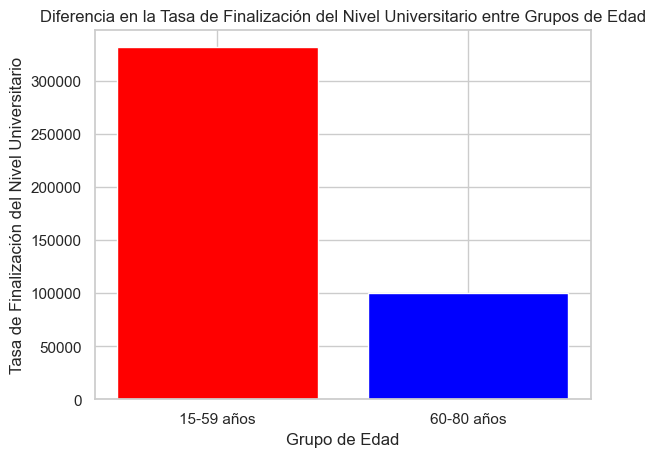

In [138]:
#Tuve que pasar las edad a un valor numerico, porque estaban en string (me ayude del chat), y la funcion de if es porque la ultima categoria dice "80 y más"
df_final['edad_numerica'] = df_final['edad'].apply(lambda x: np.mean([int(i) for i in x.split('-')]) if '-' in x else 80)
# Despues agrupo los rango definidos en la hipotesis 
grupo_15_59 = df_final[(df_final['edad_numerica'] >= 15) & (df_final['edad_numerica'] <= 59)]
grupo_60_80 = df_final[(df_final['edad_numerica'] >= 60) & (df_final['edad_numerica'] <= 80)]

# Calcular la media por grupo
tasa_universitario_15_59 = grupo_15_59['universitario_completo'].mean()
tasa_universitario_60_80 = grupo_60_80['universitario_completo'].mean()

plt.bar(['15-59 años', '60-80 años'], [tasa_universitario_15_59, tasa_universitario_60_80], color=['red', 'blue'])
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Finalización del Nivel Universitario')
plt.title('Diferencia en la Tasa de Finalización del Nivel Universitario entre Grupos de Edad')
plt.show()

# Conclusión

En este grafico se ve que , en general, la proporción de personas con nivel universitario es menor en el grupo de edad de 60 a 80 años en comparación con el grupo de 15 a 59 años. Este hallazgo sugiere que las personas que actualmente tienen entre 60 y 80 años han completado el nivel universitario en menor medida que la generación más joven.